In [1]:
import gym
import time
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")

In [2]:
def Q_func(features, params):
    return 1 # np.dot(features, params)

def features_func(state, action):
    return state + action

def max_argmax(Q_func, features_func, state, actions_list):
    Q_func_values = [ ]
    for action in actions_list:
            Q_func_values.append(Q_func(features_func(state, action), params))
    
    best_value = max(Q_func_values)
    best_action = actions_list[Q_func_values.index(best_value)]

    return (best_value, best_action)

def diff(reward, max_Q_value, Q_value, disc_factor):
    return reward + disc_factor * max_Q_value - Q_value

def update_params(params, features, difference, alpha):
    params += alpha * difference * features
    return params

In [3]:
env = gym.make('MsPacman-ram-v0')
state = env.reset() # initialize the environment

disc_factor  = 0.9 # discounting factor
alpha = 0.1 # learning rate
actions_list = [0, 1, 2, 3, 4, 5, 6, 7, 8]
features_space_dim = state.shape[0]

# The Q function will be a linear combination of
# the features, and for each of them it has one
# parameter to be learned
params = np.random.randn(features_space_dim)

/home/simone/anaconda3/envs/RLpaper/lib/python3.6/site-packages/gym/envs/registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)


In [4]:
state

array([  0, 112, 114, 115,  48,   3,  88,  88,  88,  88,  88,   0,  80,
        80,  80,  50,  98,   0,   0,   3,   0,   0,   1,   0,   0,   1,
         6,   6, 198,   4,  63,   0,  45,   1,   0, 198, 198,   0,   0,
         0,   0,  32,  52,   0,   0, 120,   0, 100, 130,   0,   0, 134,
         1, 222,   0,   1,   3,   0,   6,  80, 255, 255,   0, 255, 255,
        80, 255, 255,  80, 255, 255,  80, 255, 255,  80, 191, 191,  80,
       191, 191,  80, 191, 191,  80, 255, 255,  80, 255, 255,  80, 255,
       255,  80, 255, 255,   0, 255, 255,  80, 255, 255,  20, 223,  43,
       217, 123, 217, 123, 217, 123, 217, 123, 217, 123, 217, 221,   0,
        63,   0,   0,   0,   0,   0,   2,  66, 240, 146, 215], dtype=uint8)

In [5]:
Q_value_old = -50 # naive initialization
total_reward_over_time = np.zeros((1)) # cumulative reward
total_reward = 0

action = actions_list[np.random.randint(len(actions_list))] # random first action
state, reward, done, info = env.step(action)

total_reward += reward
total_reward_over_time = np.append(total_reward_over_time, total_reward)

Q_value = Q_func(state, action) # Q-func in the new state

# parameters update
difference = diff(reward, Q_value, Q_value_old, disc_factor)
features = features_func(state, action)
params = update_params(params, features, difference, alpha)

Q_value_old = Q_value

for t in range(1000):
    time.sleep(0.03)
    env.render()

    max_Q_value, best_action = max_argmax(Q_func, features_func, state, actions_list)
    action = best_action # 100%-greedy selection

    state, reward, done, info = env.step(action)
    total_reward += reward
    total_reward_over_time = np.append(total_reward_over_time, total_reward)

    Q_value = Q_func(state, action)
    
    # parameters update
    features = features_func(state, action)
    difference = diff(reward, max_Q_value, Q_value_old, disc_factor)    
    params = update_params(params, features, difference, alpha)

    Q_value_old = Q_value

    if done: # lost all lives
        break
env.close()

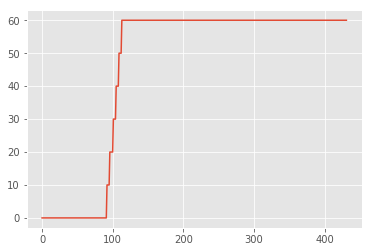

In [6]:
plt.plot(total_reward_over_time)

In [7]:
env.close()